### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

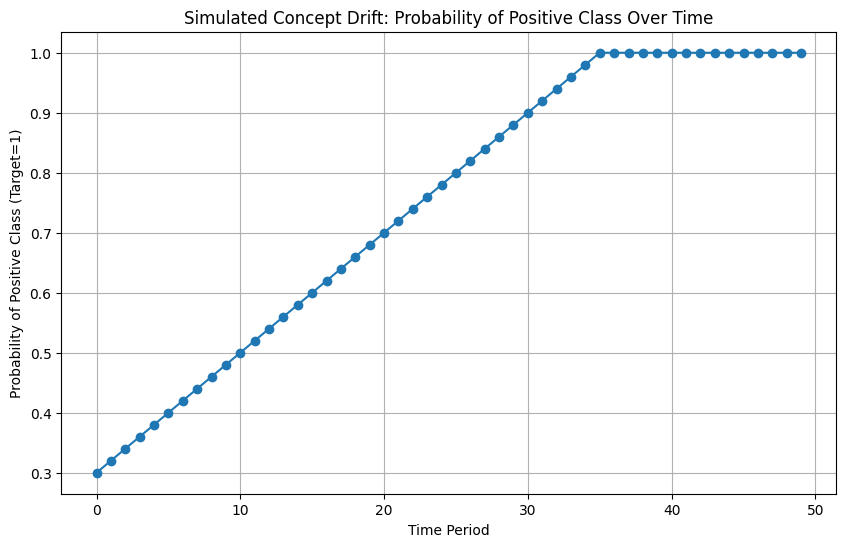

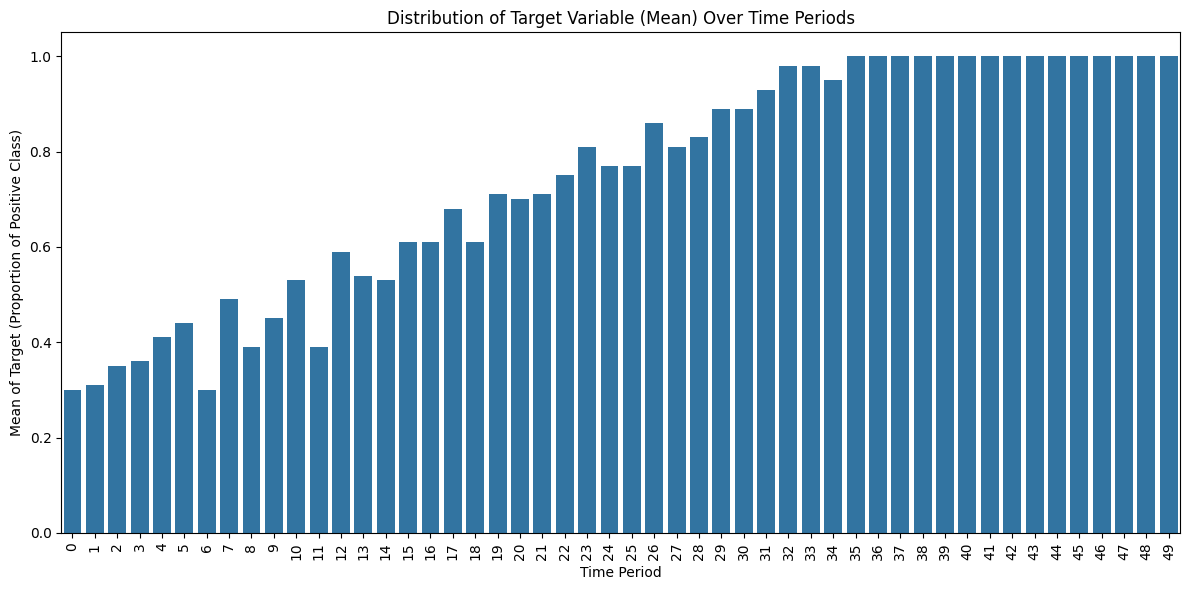

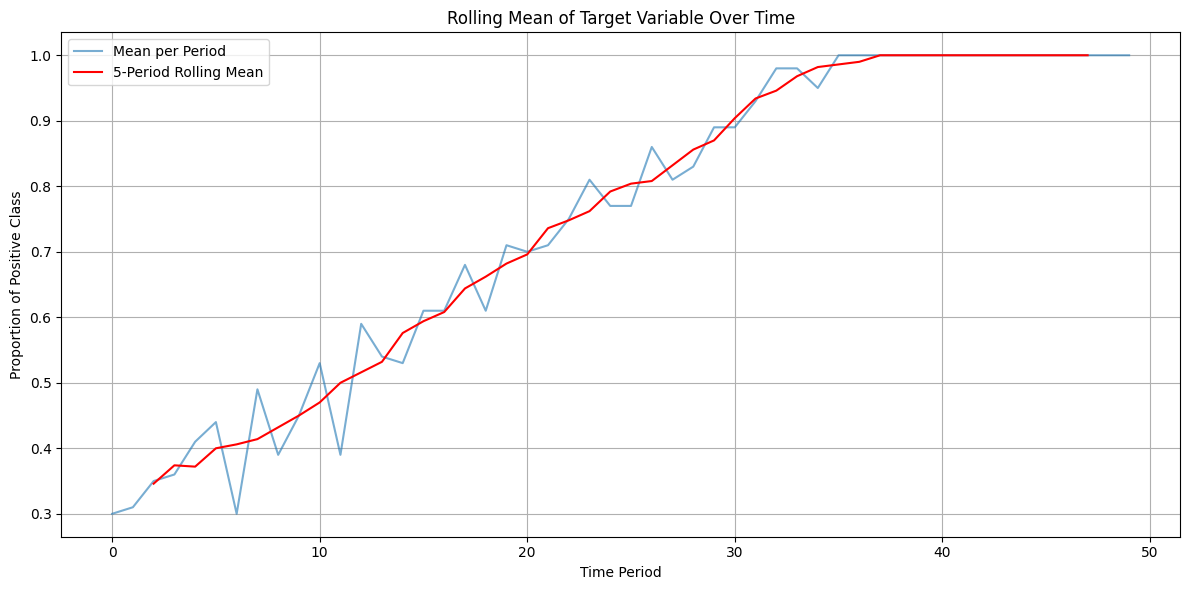

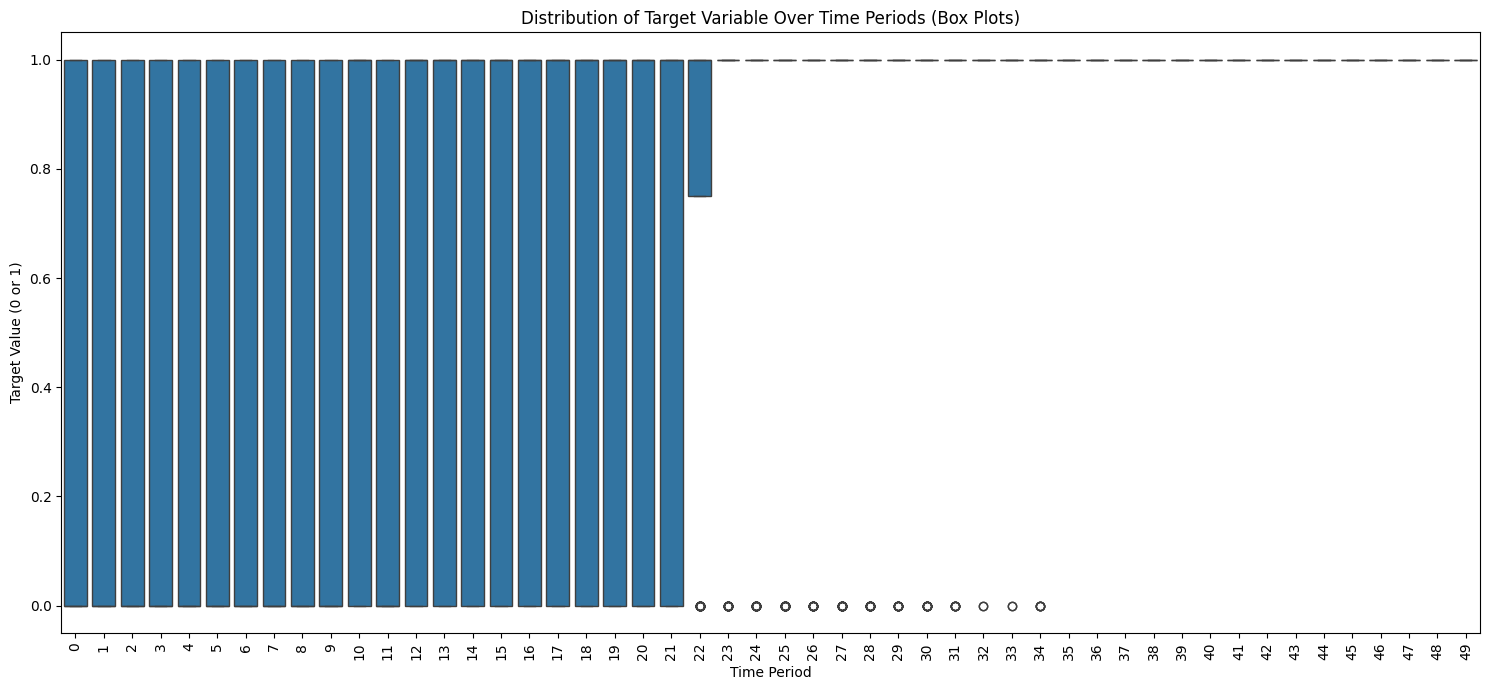


Simulated concept drift data and visualizations generated.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Simulation Parameters ---
num_time_periods = 50
num_samples_per_period = 100
initial_positive_probability = 0.3
drift_rate = 0.02  # Rate at which the probability of positive class changes per period
random_seed = 42
np.random.seed(random_seed)

# --- Simulate Concept Drift ---
time_periods = range(num_time_periods)
positive_probabilities = [initial_positive_probability + i * drift_rate for i in time_periods]
# Ensure probabilities stay within [0, 1]
positive_probabilities = np.clip(positive_probabilities, 0, 1)

all_data = []
for t, prob in zip(time_periods, positive_probabilities):
    # Generate binary target variable based on the current probability
    target = np.random.binomial(1, prob, num_samples_per_period)
    df = pd.DataFrame({'time_period': [t] * num_samples_per_period, 'target': target})
    all_data.append(df)

drift_df = pd.concat(all_data, ignore_index=True)

# --- Visualize Concept Drift ---

# 1. Plot the change in the probability of the positive class over time
plt.figure(figsize=(10, 6))
plt.plot(time_periods, positive_probabilities, marker='o')
plt.title('Simulated Concept Drift: Probability of Positive Class Over Time')
plt.xlabel('Time Period')
plt.ylabel('Probability of Positive Class (Target=1)')
plt.grid(True)
plt.show()

# 2. Visualize the distribution of the target variable across time periods
plt.figure(figsize=(12, 6))
sns.barplot(x='time_period', y='target', data=drift_df, errorbar=None)
plt.title('Distribution of Target Variable (Mean) Over Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Mean of Target (Proportion of Positive Class)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Visualize the proportion of the positive class with a rolling window
rolling_mean = drift_df.groupby('time_period')['target'].mean().rolling(window=5, center=True).mean()
plt.figure(figsize=(12, 6))
plt.plot(time_periods, drift_df.groupby('time_period')['target'].mean(), label='Mean per Period', alpha=0.6)
plt.plot(time_periods, rolling_mean, label='5-Period Rolling Mean', color='red')
plt.title('Rolling Mean of Target Variable Over Time')
plt.xlabel('Time Period')
plt.ylabel('Proportion of Positive Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Visualize the distribution of the target variable using box plots
plt.figure(figsize=(15, 7))
sns.boxplot(x='time_period', y='target', data=drift_df)
plt.title('Distribution of Target Variable Over Time Periods (Box Plots)')
plt.xlabel('Time Period')
plt.ylabel('Target Value (0 or 1)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\nSimulated concept drift data and visualizations generated.")